Fake News
Yael Shafran, Yoav Ast, Omri Shtayer

Data Overview
In this database we have a list of fake news headlines and s
Target questions that could Identify fake news
1. Frequently used words in fake news
2. Specific Buzz words in Headlines that could identify fake news
3. Length of headlines & body in fake news V
4. Grammer structure of headlines 
    
    4.1 Connecting common words found in fake text to real text
    
    4.2 Connecting word counts in headlines (Although, and, as, because, but, either, even, how, however, if, or, otherwise, since, unless, what, when, whether)
    
    4.3 Exclamation (!) marks in headlines 
    
    4.4 Statistical usage in headlines (Usage of %, percent)
   
    4.5 Punctuation marks used in headlines ( , . :)
    
5. Specific sites that tend to publish fake news about specific topics?
    - will need to catagorize the headlines as topics based on words?
    
6. Replication of words inside the body and headlines

7. Are fake headlines without body text?

Our prediction will be from a formula - 


##fake > label = 0

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns

from urllib.parse import urlparse
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 1: Importing the Database and getting initial information from it

In [2]:
df_fake = pd.read_csv('Data/fakenews.csv')

In [3]:
df_fake

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [6]:
df_fake.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [5]:
df_fake.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Identify Missing Data

In [6]:
df_fake.isnull().sum()
##We can see that there are 21 rows in which the Body is null
##In our case we don't want to take this null rows out - since they can help us identify fake news cases

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

Dealing with our missing Data - replacing all null values in the body with "No"

In [7]:
df_fake.fillna(value='NO',inplace=True)
df_fake.info()
##We can see that there are no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        4009 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [8]:
df_fake['Label'].value_counts()

0    2137
1    1872
Name: Label, dtype: int64

3. Inserting Additional information of the length of the body and head to our table

In [9]:
df_fake['head_length'] = [len(headline) for headline in df_fake['Headline']]
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 5 columns):
URLs           4009 non-null object
Headline       4009 non-null object
Body           4009 non-null object
Label          4009 non-null int64
head_length    4009 non-null int64
dtypes: int64(2), object(3)
memory usage: 156.7+ KB


In [80]:
df_fake['body_length'] = [len(body) for body in df_fake['Body']]
df_fake.head()

,URLs,Headline,Body,Label,head_length,body_length,excla,Site,check,Trump,excla_body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,42,6412,0,www.bbc.com,3.634921,True,0
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,66,3325,0,www.reuters.com,0.763315,False,0
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,60,6580,0,www.nytimes.com,1.827778,True,0
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,68,630,0,www.reuters.com,0.136246,False,0
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,43,213,0,www.cnn.com,0.115197,False,0


4.1 Connecting common words found in fake text to real text

In [545]:
connectwords = ['Although', 'and', 'as', 'because', 'but', 'either', 'even', 'how', 'however','if', 'or', 'otherwise', 'since', 'unless', 'what', 'when', 'whether']

['Although',
 'and',
 'as',
 'because',
 'but',
 'either',
 'even',
 'how',
 'however',
 'if',
 'or',
 'otherwise',
 'since',
 'unless',
 'what',
 'when',
 'whether']

In [542]:
df_fakewords = ' '.join(df_fake[df_fake['Label'] == 0]['Headline'])
df_realwords = ' '.join(df_fake[df_fake['Label'] == 1]['Headline'])

fakewords = [word for word in nltk.tokenize.word_tokenize(df_fakewords) if word not in stopwords.words('english') and len(word) > 3]
realwords = [word for word in nltk.tokenize.word_tokenize(df_realwords) if word not in stopwords.words('english') and len(word) > 3]

SyntaxError: invalid syntax (<ipython-input-542-5bcf8a9e930a>, line 3)

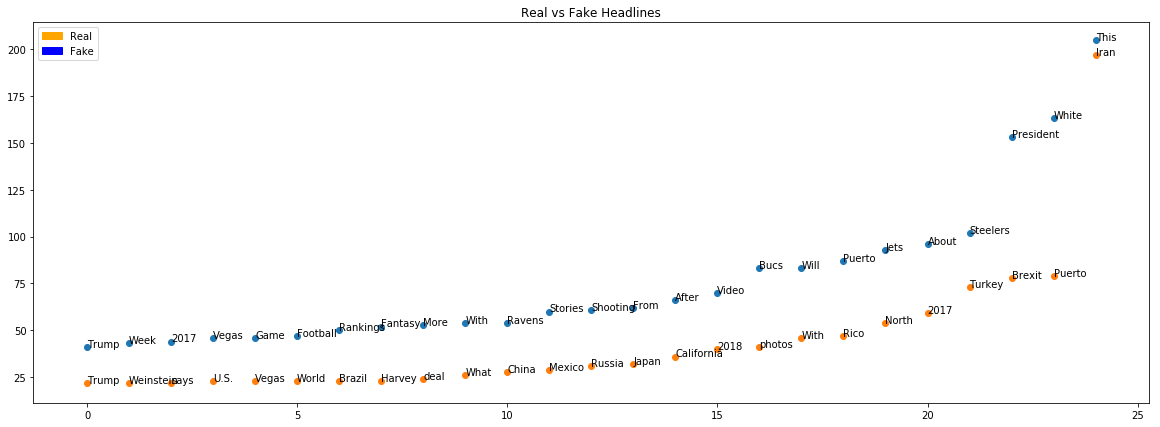

In [203]:
common_fake = nltk.FreqDist(fakewords).most_common(25)
common_real = nltk.FreqDist(realwords).most_common(25)
fake_ranks = []
fake_counts = []
real_ranks = []
real_counts = []

for ii, word in enumerate(reversed(common_fake)):
    fake_ranks.append(ii)
    fake_counts.append(word[1])

for ii, word in enumerate(reversed(common_real)):
    real_ranks.append(ii)
    real_counts.append(word[1])

plt.figure(figsize=(20, 7))

plt.scatter(fake_ranks, fake_counts)

for labels, fake_rank, fake_count in zip(common_fake, fake_ranks, fake_counts):
    plt.annotate(
        labels[0],
        xy = (fake_rank, fake_count)
    )

plt.scatter(real_ranks, real_counts)
plt.title('Real vs Fake Headlines')

for labels, real_rank, real_count in zip(common_real, real_ranks, real_counts):
    plt.annotate(
        labels[0],
        xy = (real_rank, real_count)
    )

real_patch = mpatches.Patch(color='orange', label='Real')
fake_patch = mpatches.Patch(color='blue', label='Fake')
plt.legend(handles=[real_patch, fake_patch])

plt.show()

We can see that there are certain words used in fake or real news - 
we will grade those words later in the project

4.3 Exclamation (!) marks in headlines 

In [73]:
df_fake['excla'] = df_fake['Headline'].str.contains('!')==True
##Setting a Variable which tells us if the Headlines has a ! in the text
df_fake['excla_body'] = df_fake['Body'].str.contains('!')==True

In [76]:
df_fake['excla'] = df_fake.excla.astype(int)
df_fake['excla_body'] = df_fake.excla.astype(int)
df_fake

,URLs,Headline,Body,Label,head_length,body_length,excla,Site,check,Trump,excla_body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,42,6412,0,www.bbc.com,3.634921,True,0
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,66,3325,0,www.reuters.com,0.763315,False,0
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,60,6580,0,www.nytimes.com,1.827778,True,0
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,68,630,0,www.reuters.com,0.136246,False,0
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,43,213,0,www.cnn.com,0.115197,False,0
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,32,645,0,beforeitsnews.com,0.629883,False,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1,54,7575,0,www.nytimes.com,2.597737,True,0
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1,75,2229,0,www.reuters.com,0.396267,False,0
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1,58,2712,0,www.reuters.com,0.806183,False,0
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1,73,1373,0,www.reuters.com,0.257647,False,0


Checking for the occurence of the common words

In [512]:
df_fake['str'] = df_fake['Headline'].str.contains('str')==True
pd.crosstab(df_fake['str'], df_fake['Label'])

Label,0,1
new,,
False,2134,1824
True,3,48


In [513]:
df_fake['new'] = df_fake.new.astype(int)
df_fake['new'].value_counts()

0    3958
1      51
Name: new, dtype: int64

5. Categorizing out all the sites

In [13]:
count = df_fake['URLs']
df_fake['Site'] = 0
df_fake['Site']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3979    0
3980    0
3981    0
3982    0
3983    0
3984    0
3985    0
3986    0
3987    0
3988    0
3989    0
3990    0
3991    0
3992    0
3993    0
3994    0
3995    0
3996    0
3997    0
3998    0
3999    0
4000    0
4001    0
4002    0
4003    0
4004    0
4005    0
4006    0
4007    0
4008    0
Name: Site, Length: 4009, dtype: int64

In [14]:
counter = len(df_fake)

In [15]:
i=0
for i in range(0, counter):
    df_fake['Site'].iloc[i] = urlparse(df_fake['URLs'].iloc[i]).hostname

C:\Users\OMRI\Anaconda32\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
df_fake['Site'].to_csv('Data/Sitecsv.csv')

In [46]:
df_fake['Site'].value_counts()

beforeitsnews.com            1694
www.reuters.com               646
www.cnn.com                   389
www.nytimes.com               344
www.bbc.com                   333
www.activistpost.com          271
dailybuzzlive.com              99
www.disclose.tv                71
abcnews.go.com                 57
money.cnn.com                  49
edition.cnn.com                16
inhealth.cnn.com               14
www.bbc.co.uk                  10
bleacherreport.com              8
clarivate.com                   3
api.content-ad.net              2
thelab.bleacherreport.com       1
reuters.com                     1
cnn.it                          1
Name: Site, dtype: int64

Ending our basic handling of the database

In [546]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
URLs           4009 non-null object
Headline       4009 non-null object
Body           4009 non-null object
Label          4009 non-null int64
head_length    4009 non-null int64
body_length    4009 non-null int64
excla          4009 non-null int32
Site           4009 non-null object
check          4009 non-null float64
Trump          4009 non-null int32
excla_body     4009 non-null int32
quest          4009 non-null bool
new            4009 non-null int32
dtypes: bool(1), float64(1), int32(4), int64(3), object(4)
memory usage: 317.2+ KB


Step 2: Getting information through plots

Checking our Categorical data of which we don't have a lot

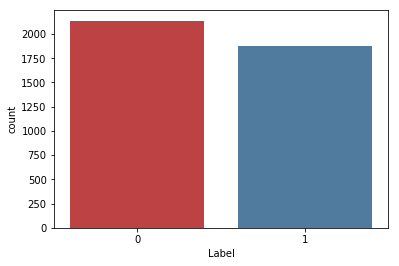

In [16]:
sns.countplot(x='Label', data=df_fake, saturation=0.6,palette="Set1")

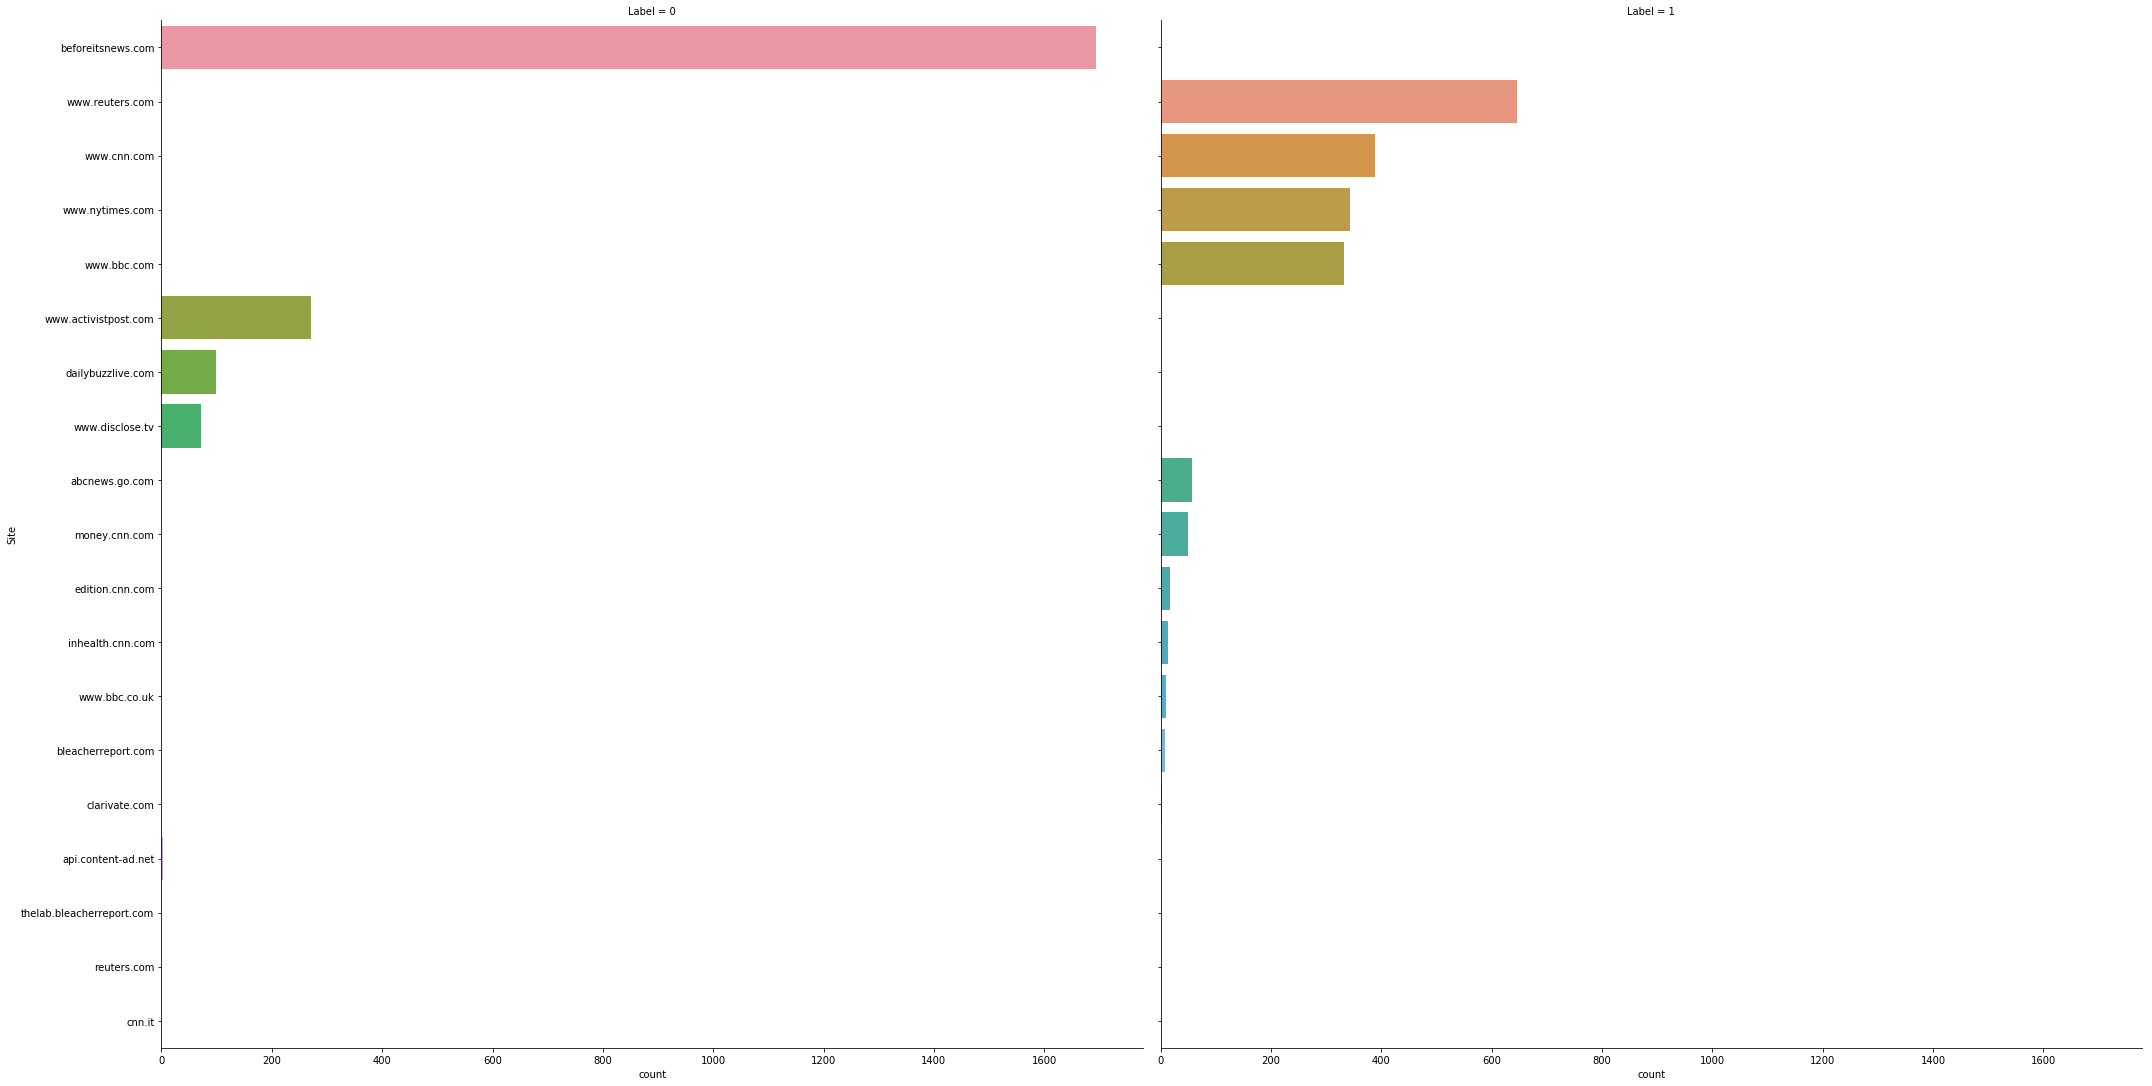

In [18]:
sns.catplot(y="Site", col="Label",data=df_fake,order=df_fake['Site'].value_counts().index , kind="count", height=15)

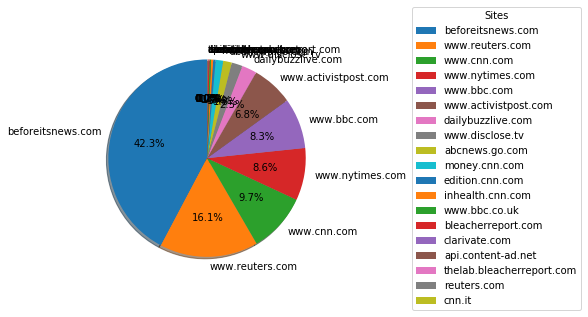

In [19]:
fig1, ax1 = plt.subplots()

slices = df_fake["Site"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels,shadow=True, startangle=90,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="center left", title="Sites",bbox_to_anchor=(1.1, 1, 0, -1))
plt.show()

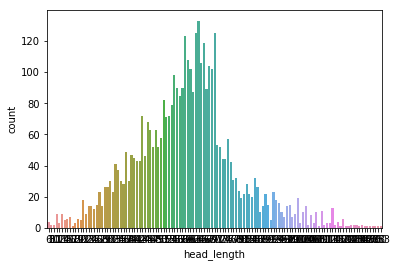

In [20]:
sns.countplot(x='head_length',data=df_fake)

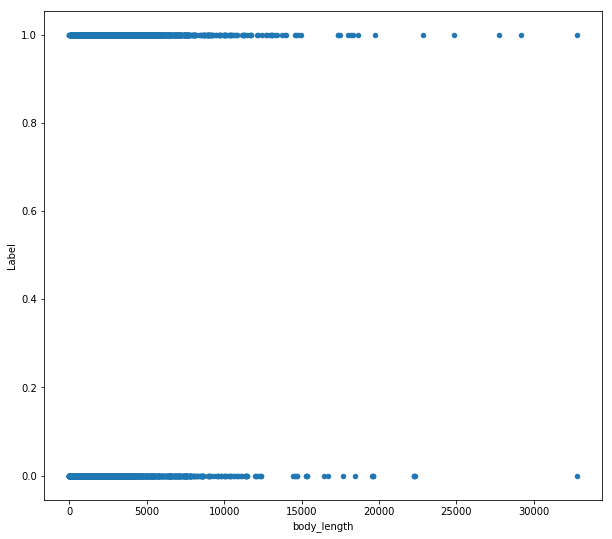

In [21]:
df_fake.plot(x='body_length', y='Label', figsize=(10,9),kind='scatter')

Plots of the body length and head with grouby of fake 

In [22]:
dfFake = df_fake[df_fake['Label']==True]
dfTrue = df_fake[df_fake['Label']==False]

C:\Users\OMRI\Anaconda32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


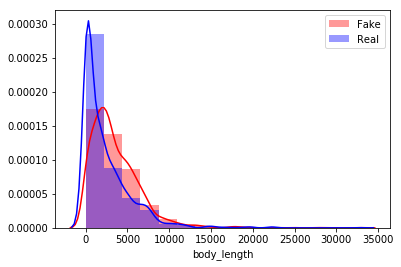

In [438]:
sns.distplot(dfFake['body_length'], bins=15, color="Red",label="Fake")
sns.distplot(dfTrue['body_length'], bins=15, color="Blue",label="Real")
plt.legend()

C:\Users\OMRI\Anaconda32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


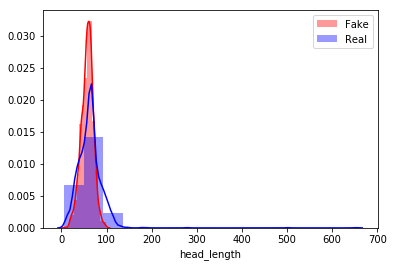

In [442]:
sns.distplot(dfFake['head_length'], bins=15, color="Red",label="Fake")
sns.distplot(dfTrue['head_length'], bins=15, color="Blue",label="Real")
plt.legend()

C:\Users\OMRI\Anaconda32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


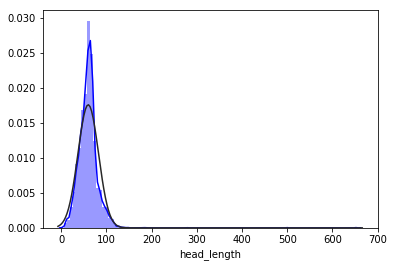

In [25]:
from scipy.stats import norm
sns.distplot(df_fake['head_length'], bins=100, color="Blue",fit=norm)

Exploring numerical features with histograms

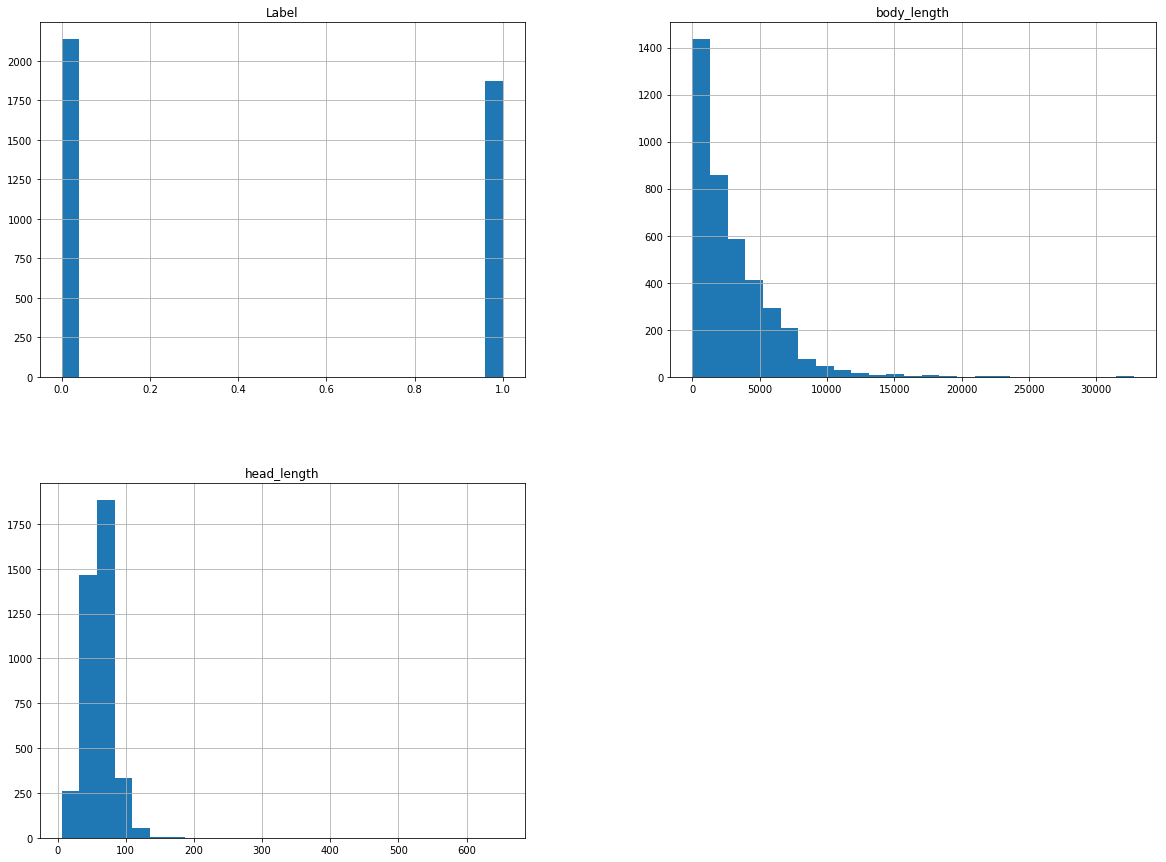

In [26]:
df_fake.hist(bins = 25, figsize = (20,15), column=["body_length","head_length","Label"]) 
plt.show()

C:\Users\OMRI\Anaconda32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


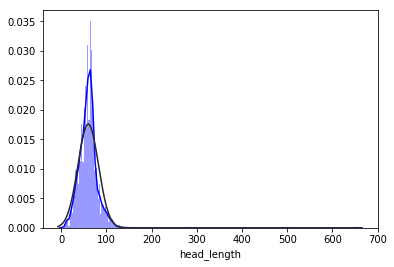

In [27]:
sns.distplot(df_fake['head_length'], bins=250, color="Blue", fit=norm)

Handling non normal distributions

In [28]:
df_fake['head_length'].describe()

count    4009.000000
mean       60.104016
std        22.660900
min         6.000000
25%        48.000000
50%        60.000000
75%        69.000000
max       653.000000
Name: head_length, dtype: float64

C:\Users\OMRI\Anaconda32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


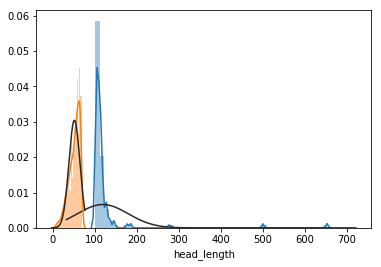

In [29]:
df_longhead = df_fake[df_fake["head_length"] > 100] 
df_shorthead = df_fake[df_fake["head_length"] <= 69] 
sns.distplot(df_longhead["head_length"], fit=norm)
sns.distplot(df_shorthead["head_length"], fit=norm)

In [30]:
len_head = np.clip(df_fake['head_length'], 30, 100 )

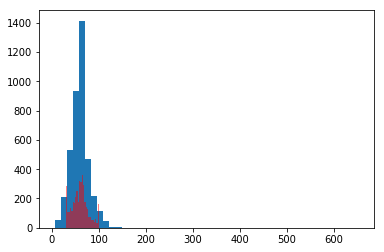

In [31]:
plt.hist(df_fake['head_length'], bins=50)
plt.hist(len_head, bins=25, color='red', alpha = 0.5)
plt.show()

3d Graph

Text(0.5,0.92,'Lengths Labels')

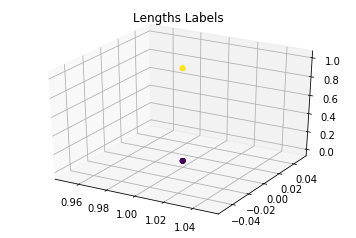

In [259]:
ax = plt.axes(projection='3d')
x= df_fake['head_length']
y= df_fake['body_length'] / x
z= df_fake['Label']
ax.scatter3D(x, y, z, c=z, cmap='viridis');
ax.set_title('Lengths Labels')

In [33]:
check = y / x
df_fake['check'] = check
df_fake['check']

0       3.634921
1       0.763315
2       1.827778
3       0.136246
4       0.115197
5       0.629883
6       2.597737
7       0.396267
8       0.806183
9       0.257647
10      0.389374
11      0.267012
12      2.471875
13      0.206005
14      0.022645
15      3.739796
16      1.814286
17      0.055899
18      0.030277
19      0.106934
20      0.041617
21      0.005861
22      0.274898
23      0.616941
24      0.027772
25      0.552686
26      0.030277
27      0.050454
28      3.277778
29      0.654900
          ...   
3979    0.013374
3980    0.759637
3981    2.036281
3982    0.023866
3983    0.151981
3984    0.103422
3985    0.909221
3986    2.287753
3987    0.071456
3988    0.428254
3989    2.095662
3990    0.596939
3991    1.062400
3992    0.583333
3993    0.020200
3994    2.323457
3995    3.076800
3996    1.216049
3997    1.069199
3998    0.008262
3999    0.846537
4000    0.368135
4001    1.042241
4002    0.107278
4003    0.027438
4004    8.146667
4005    0.118806
4006    0.0010

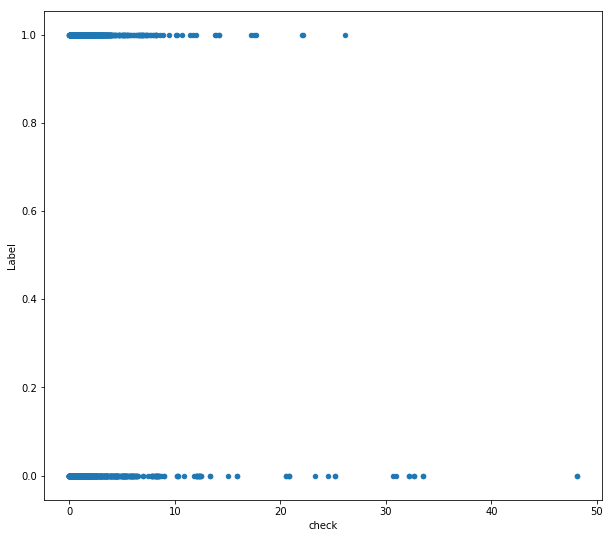

In [34]:
df_fake.plot(x='check', y='Label', figsize=(10,9),kind='scatter')

7. Checking if when there is no text in the body of the headline if its fake

In [36]:
##Setting a Variable which tells us if the headline has no Body text
Var_NoBody = df_fake.loc[df_fake['Body'] == 'NO']
Var_NoBody.count()

URLs           21
Headline       21
Body           21
Label          21
head_length    21
body_length    21
excla          21
Site           21
check          21
dtype: int64

In [262]:
df_fake['URLs'].loc[df_fake['Body']=='NO']

247     https://www.nytimes.com/interactive/2017/10/12...
269     https://www.nytimes.com/2017/10/10/magazine/th...
325     http://edition.cnn.com/interactive/2017/10/mid...
395     http://beforeitsnews.com/entertainment/2017/09...
509     http://beforeitsnews.com/sports/2017/10/105-tr...
882     http://beforeitsnews.com/sports/2017/10/103-ha...
973     http://beforeitsnews.com/sports/2017/10/ravens...
981     http://beforeitsnews.com/sports/2017/10/104-tr...
1006    https://www.activistpost.com/2017/09/scientist...
1133    http://beforeitsnews.com/sports/2017/10/106-hb...
1210    http://beforeitsnews.com/sports/2017/10/105-ex...
1500    http://beforeitsnews.com/u-s-politics/2017/09/...
1785    http://beforeitsnews.com/sports/2017/10/ravens...
2254    https://www.activistpost.com/2017/09/new-un-re...
2302    https://www.activistpost.com/2017/09/the-kurdi...
2709    http://beforeitsnews.com/sports/2017/10/106-po...
2959    http://beforeitsnews.com/sports/2017/10/103-ex...
3108    https:

In [37]:
Var_NoBody = Var_NoBody['Label'].mean()
Var_NoBody

0.19047619047619047

Meaning - 81% of the articles with no bodies are fake!

Checking to see if there is a connection between the word Trump and fake news

In [447]:
df_fake['Trump'] = df_fake['Headline'].str.contains('Trump')==True
df_fake['Trump'].value_counts()
df_fake['Trump'] = df_fake['Trump'].astype(int)

In [448]:
pd.crosstab(df_fake['Trump'], df_fake['Site'])

Site,abcnews.go.com,api.content-ad.net,beforeitsnews.com,bleacherreport.com,clarivate.com,cnn.it,dailybuzzlive.com,edition.cnn.com,inhealth.cnn.com,money.cnn.com,reuters.com,thelab.bleacherreport.com,www.activistpost.com,www.bbc.co.uk,www.bbc.com,www.cnn.com,www.disclose.tv,www.nytimes.com,www.reuters.com
Trump,,,,,,,,,,,,,,,,,,,
0,54,2,1500,8,3,1,98,16,14,38,1,1,252,10,306,312,69,306,599
1,3,0,194,0,0,0,1,0,0,11,0,0,19,0,27,77,2,38,47


C:\Users\OMRI\Anaconda32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\OMRI\Anaconda32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


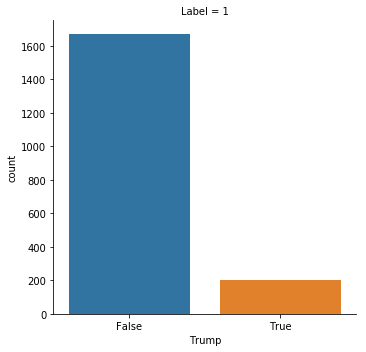

In [449]:
dfFake['Trump'] = dfFake['Headline'].str.contains('Trump')==True
dfTrue['Trump'] = dfTrue['Headline'].str.contains('Trump')==True
sns.catplot(x="Trump", col="Label",data=dfFake, kind="count", height=5)

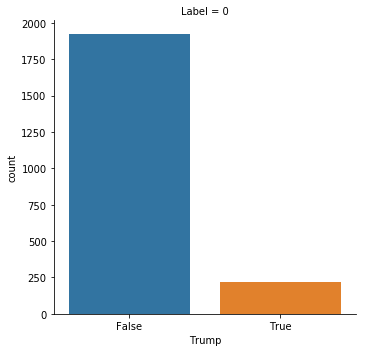

In [450]:
sns.catplot(x="Trump", col="Label",data=dfTrue, kind="count", height=5)

We can see that when using the word trump
there are almost the same results with fake / real data

Cross checking the various Columns with Label to see if there are relevant connections

In [83]:
excla_label = pd.crosstab(df_fake['excla'], df_fake['Label'])

In [84]:
excla_label

Label,0,1
excla,,
0,2040,1857
1,97,15


We can see clearly from the crosstab that when using "!" in the headlinee there is a 87% chance of it being fake

excla
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

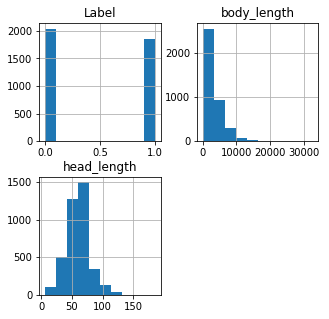

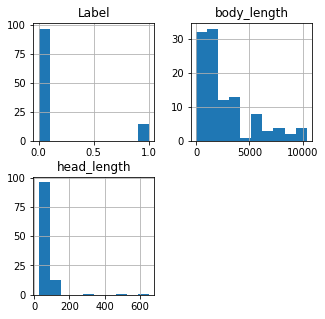

In [44]:
df_fake.groupby('excla').hist(bins = 10, figsize = (5,5), column=["Label", "body_length","head_length"])

excla
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

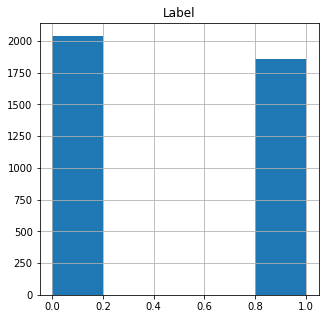

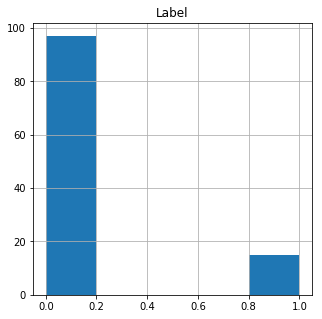

In [418]:
df_fake.groupby('excla').hist(bins = 5, figsize = (5,5), column=["Label"])

We can see quite clearly that when using "!" in the Headline 
most news are fake

In [46]:
pd.crosstab(df_fake['Site'], df_fake['Label'])

Label,0,1
Site,,
abcnews.go.com,0,57
api.content-ad.net,2,0
beforeitsnews.com,1694,0
bleacherreport.com,0,8
clarivate.com,0,3
cnn.it,0,1
dailybuzzlive.com,99,0
edition.cnn.com,0,16
inhealth.cnn.com,0,14


From the information from our Sites crosstab we see that from each site the data is either fake or not depending on the site-
therefore we cannot ascertain wether the data extraction was biased or the site is biased. 

We therfore need more data from those site

Training our data

In [515]:
df_fortrain = df_fake.drop(columns=["URLs","Headline","Body","Site","quest"])
df_fortrain['new'] = df_fortrain['new'].astype(int)
df_fortrain

,Label,head_length,body_length,excla,check,Trump,excla_body,new
0,1,42,6412,0,3.634921,1,0,0
1,1,66,3325,0,0.763315,0,0,0
2,1,60,6580,0,1.827778,1,0,0
3,1,68,630,0,0.136246,0,0,0
4,1,43,213,0,0.115197,0,0,0
5,0,32,645,0,0.629883,0,0,0
6,1,54,7575,0,2.597737,1,0,0
7,1,75,2229,0,0.396267,0,0,1
8,1,58,2712,0,0.806183,0,0,0
9,1,73,1373,0,0.257647,0,0,0


In [516]:
train_df, test_df= train_test_split (df_fortrain, test_size = 0.2, random_state=7)

In [517]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 356 to 175
Data columns (total 8 columns):
Label          3207 non-null int64
head_length    3207 non-null int64
body_length    3207 non-null int64
excla          3207 non-null int32
check          3207 non-null float64
Trump          3207 non-null int32
excla_body     3207 non-null int32
new            3207 non-null int32
dtypes: float64(1), int32(4), int64(3)
memory usage: 175.4 KB


In [518]:
train_df.describe()

,Label,head_length,body_length,excla,check,Trump,excla_body,new
count,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000
mean,0.468974,60.345806,2927.597755,0.030558,1.288909,0.103835,0.030558,0.013096
std,0.499114,23.369416,3065.187508,0.172144,2.835588,0.305094,0.172144,0.113705
min,0.000000,6.000000,2.000000,0.000000,0.000165,0.000000,0.000000,0.000000
25%,0.000000,48.000000,523.000000,0.000000,0.160144,0.000000,0.000000,0.000000
50%,0.000000,60.000000,2105.000000,0.000000,0.597015,0.000000,0.000000,0.000000
75%,1.000000,69.000000,4295.500000,0.000000,1.279853,0.000000,0.000000,0.000000
max,1.000000,653.000000,32767.000000,1.000000,48.088889,1.000000,1.000000,1.000000


In [519]:
train_df_numeric = train_df.iloc[:, 0:11] 
corr_df=train_df_numeric.corr()
corr_df

,Label,head_length,body_length,excla,check,Trump,excla_body,new
Label,1.000000,-0.111355,0.191255,-0.123284,0.000532,0.016042,-0.123284,0.106092
head_length,-0.111355,1.000000,0.032347,0.111736,-0.343230,0.015961,0.111736,-0.009452
body_length,0.191255,0.032347,1.000000,-0.025342,0.428146,-0.074116,-0.025342,-0.005268
excla,-0.123284,0.111736,-0.025342,1.000000,-0.005896,-0.030739,1.000000,-0.020452
check,0.000532,-0.343230,0.428146,-0.005896,1.000000,-0.067194,-0.005896,-0.018725
Trump,0.016042,0.015961,-0.074116,-0.030739,-0.067194,1.000000,-0.030739,0.032719
excla_body,-0.123284,0.111736,-0.025342,1.000000,-0.005896,-0.030739,1.000000,-0.020452
new,0.106092,-0.009452,-0.005268,-0.020452,-0.018725,0.032719,-0.020452,1.000000


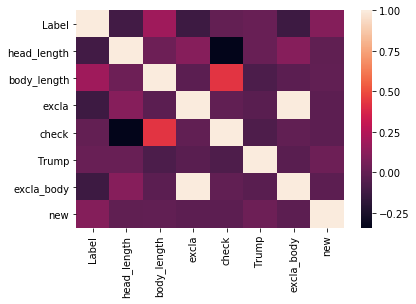

In [520]:
sns.heatmap(corr_df)

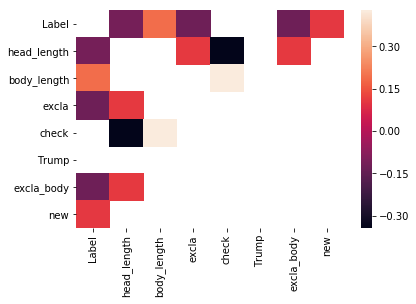

In [521]:
sns.heatmap(corr_df[(corr_df<1) & ((corr_df >= 0.1) | (corr_df <= -0.1)) ] )

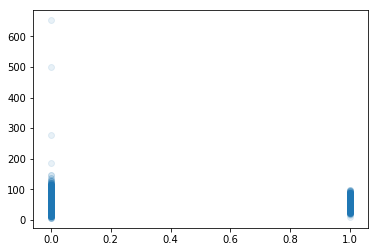

In [522]:
plt.scatter(data = train_df, x="Label", y="head_length", alpha=0.1)

C:\Users\OMRI\Anaconda32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


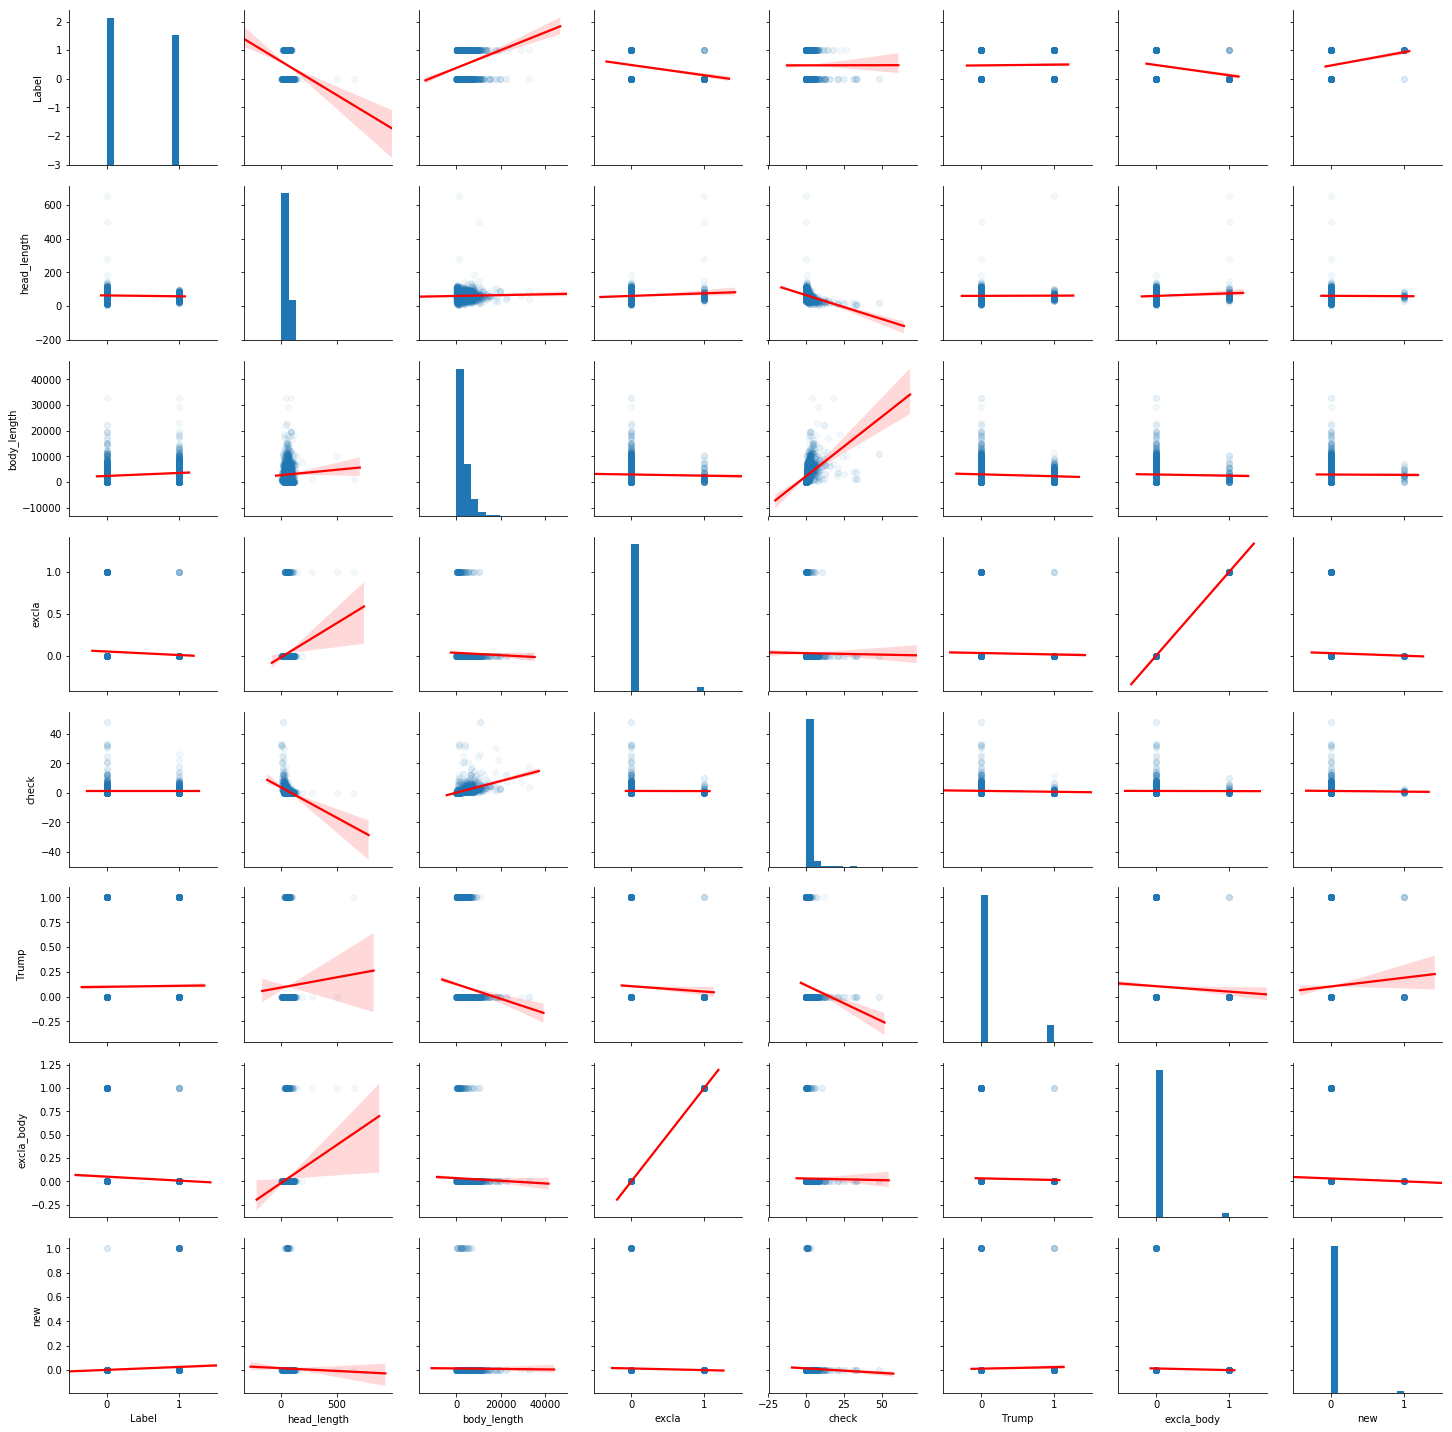

In [523]:
sns.pairplot(train_df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})

In [530]:
pd.crosstab(train_df['Label'], train_df['new'], margins=True)

new,0,1,All
Label,,,
0,1700,3,1703
1,1465,39,1504
All,3165,42,3207


Label
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

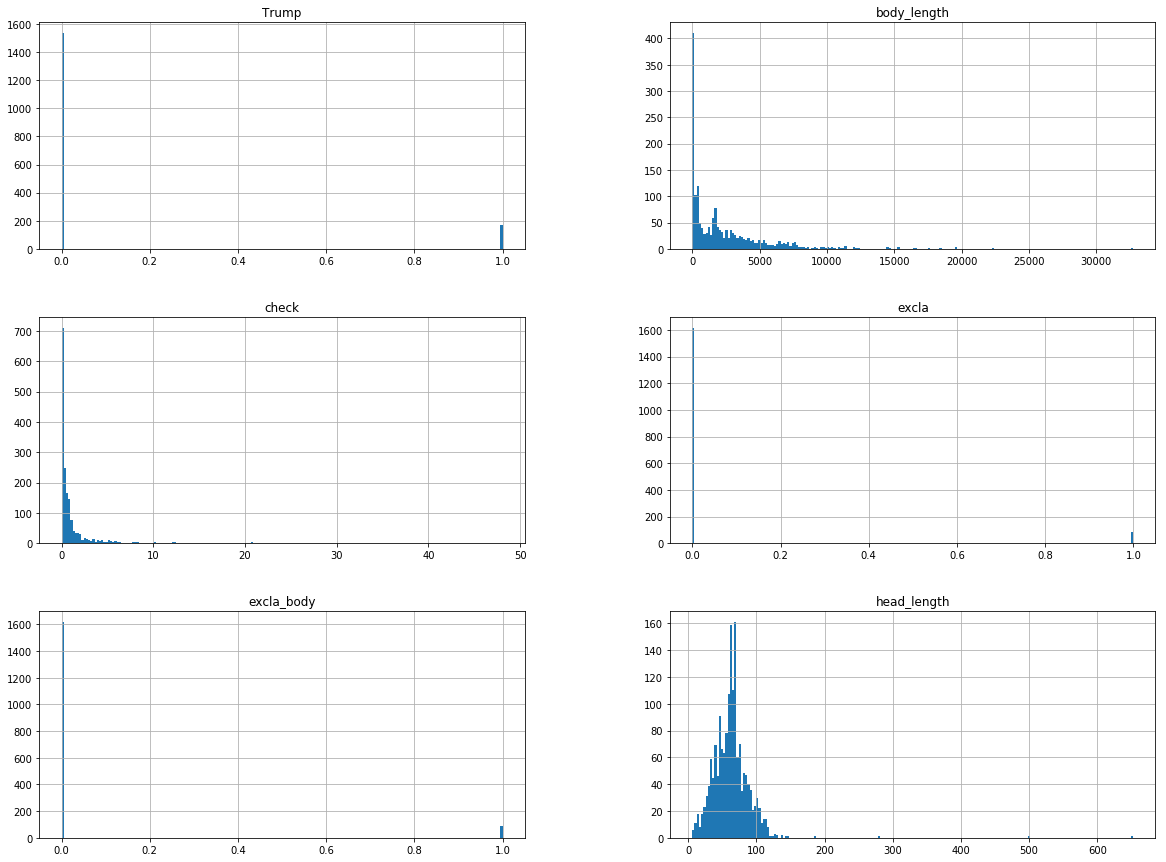

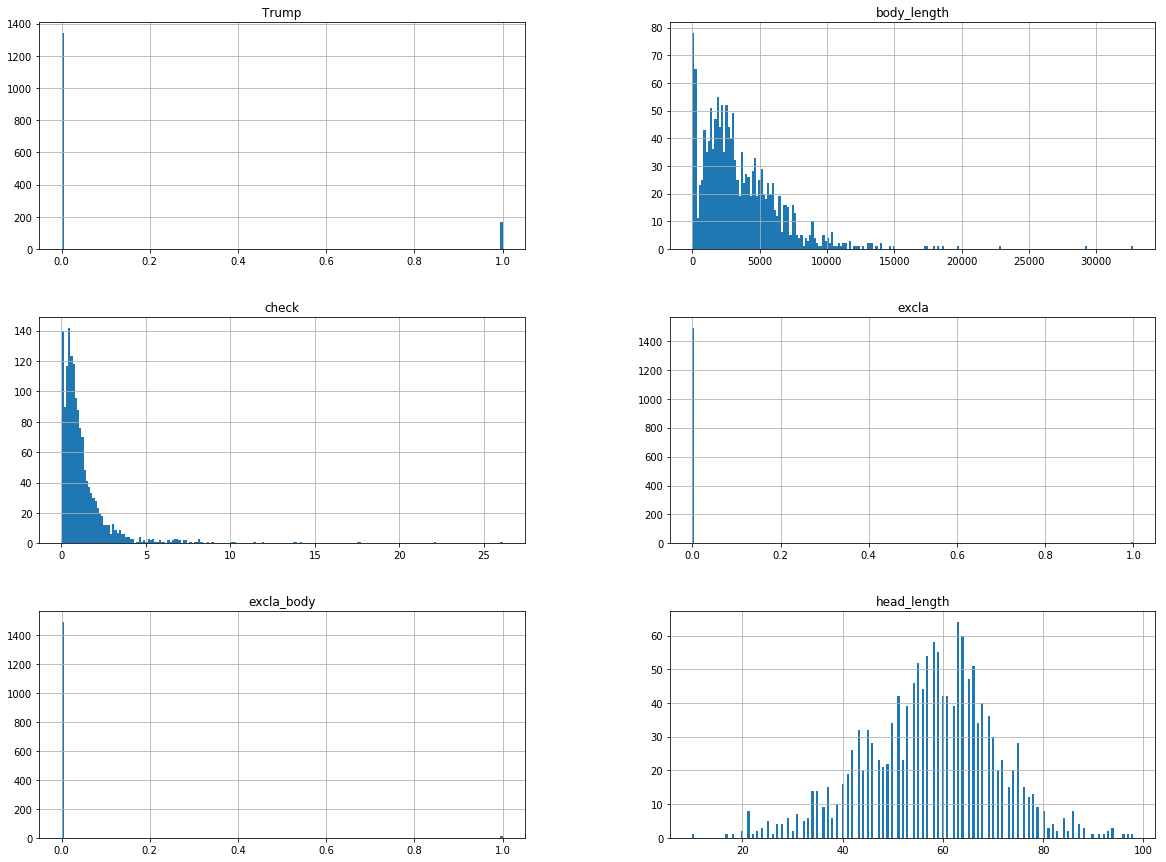

In [525]:
train_df.groupby(['Label']).hist(bins = 200, figsize = (20,15), column=["head_length", "body_length", "excla", "check", "Trump", "excla_body"])

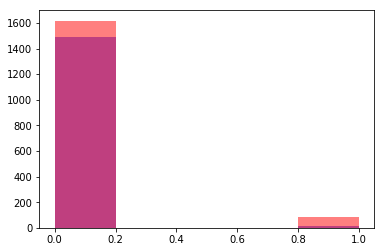

In [526]:
plt.hist(train_df[train_df["Label"] ==1]["excla"], bins=5, color='blue', alpha = 0.5)
plt.hist(train_df[train_df["Label"] ==0]["excla"], bins=5, color='red', alpha = 0.5)
plt.show()

Standardizing our data

In [531]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [532]:
train_df_std = stdsc.fit_transform(train_df)
test_df_std = stdsc.transform(test_df)

C:\Users\OMRI\Anaconda32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\OMRI\Anaconda32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\OMRI\Anaconda32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


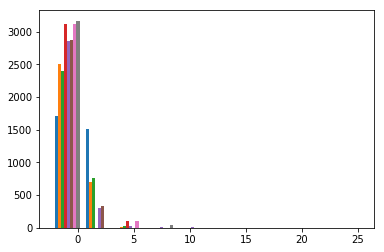

In [533]:
plt.hist(train_df_std)
plt.show()

Wrapping up and saving our prepared Data

In [534]:
import pickle

In [535]:
pickle.dump(train_df, open("train_df.dat", "wb")) # wb = write binary

In [536]:
train_df_read = pickle.load(open("train_df.dat", "rb"))

In [537]:
train_df_read.describe()

,Label,head_length,body_length,excla,check,Trump,excla_body,new
count,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000
mean,0.468974,60.345806,2927.597755,0.030558,1.288909,0.103835,0.030558,0.013096
std,0.499114,23.369416,3065.187508,0.172144,2.835588,0.305094,0.172144,0.113705
min,0.000000,6.000000,2.000000,0.000000,0.000165,0.000000,0.000000,0.000000
25%,0.000000,48.000000,523.000000,0.000000,0.160144,0.000000,0.000000,0.000000
50%,0.000000,60.000000,2105.000000,0.000000,0.597015,0.000000,0.000000,0.000000
75%,1.000000,69.000000,4295.500000,0.000000,1.279853,0.000000,0.000000,0.000000
max,1.000000,653.000000,32767.000000,1.000000,48.088889,1.000000,1.000000,1.000000


In [538]:
pickle.dump(test_df, open("test_df.dat", "wb"))
pickle.dump(train_df_std, open("train_df_std.dat", "wb"))
pickle.dump(test_df_std, open("test_df_std.dat", "wb"))